# **chapitre1** :  **Ajustement linéaires**

## **importer des bibliothèques**

In [1]:
%pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas

## **Méthode des moindres carrés**
L'équation de la droite d'ajustement est de la forme : y = ax + b, où :
- "a" est le coefficient directeur de la droite.
- "b" est l'ordonnée à l'origine de la droite.

Le coefficient directeur "a" de la droite est calculé à l'aide de la formule suivante :
a = Σ(xi - x)(yi - y) / Σ(xi - x)^2

La constante "b" (ordonnée à l'origine) est calculée à l'aide de l'équation : y = ax + b.


La covariance entre x et y est : 23538.714285714283
La variance entre x 26951.5


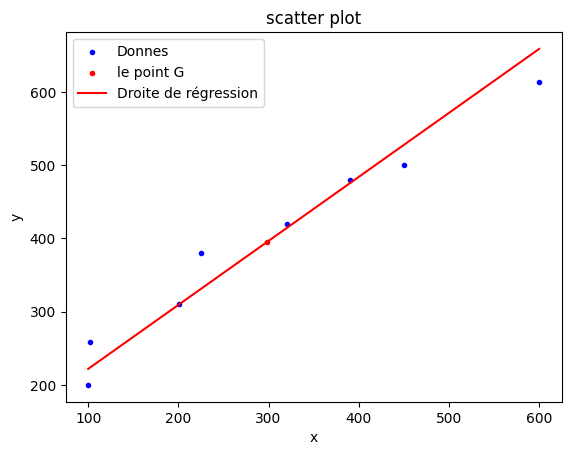

In [3]:
x = np.array([100,102,201,225,320,390,450,600])
y = np.array([200,259,310,380,420,480,500,613])
data = np.array([x, y])
cov_matrix = np.cov(data)
cov_xy = cov_matrix[0, 1]
var_x = x.var()
print("La covariance entre x et y est :", cov_xy)
print("La variance entre x", var_x)
a = cov_xy / var_x
x_bar = x.mean()
y_bar = y.mean()
G_point = [x_bar,y_bar]
b = y_bar - a*x_bar
plt.xlabel("x")
plt.ylabel("y")
plt.title("scatter plot")
plt.scatter(x,y,color='blue',marker='.',label="Donnes")
plt.scatter(G_point[0],G_point[1],color='red',marker='.',label="le point G")
plt.plot(x, a * x + b, color='red', label='Droite de régression')
plt.legend()


## **Méthode de Mayer**

La méthode de Mayer est une technique d'ajustement linéaire qui consiste à découper la série de données en deux sous-séries. Cette approche permet de prendre en compte tous les points de la série lors de l'ajustement de la droite de régression.

1. **Découpage de la série de données** :
   - La série de données est divisée en deux sous-séries, généralement de manière égale. Cela garantit que tous les points de la série sont pris en compte dans l'ajustement.

2. **Calcul des points moyens** :
   - Le point moyen est calculé pour chaque sous-série. C'est la moyenne des valeurs de la sous-série.

3. **Détermination de l'équation de la droite d'ajustement** :
   - L'équation de la droite d'ajustement est trouvée en passant par les deux points moyens des sous-séries. Cela permet d'obtenir une droite qui représente au mieux la tendance générale des données.

4. **Traitement des séries impaires** :
   - Si la série de données comporte un nombre impair de points, il est recommandé de prendre un point supplémentaire dans la deuxième sous-série. Cela permet d'augmenter son poids relatif, car elle est plus récente et donc plus représentative.

Cette méthode offre une approche intéressante pour ajuster une droite de régression tout en prenant en compte l'ensemble des données disponibles.


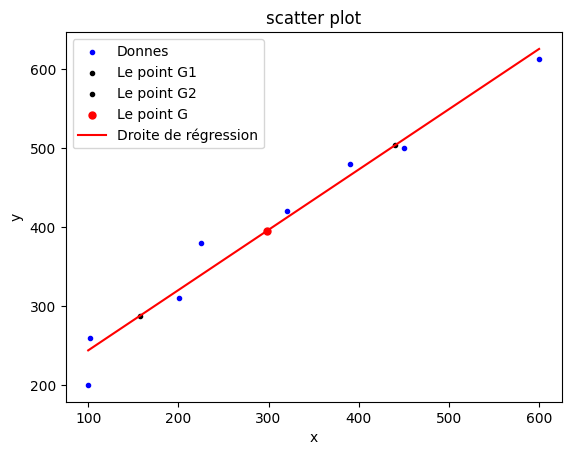

In [4]:
x = np.array([100,102,201,225,320,390,450,600])
y = np.array([200,259,310,380,420,480,500,613])

x1,x2 = x[:4],x[4:]
y1,y2 = y[:4],y[4:]

x1_bar = x1.mean()
y1_bar = y1.mean()
PG1 = [x1_bar,y1_bar]
x2_bar = x2.mean()
y2_bar = y2.mean()
PG2 = [x2_bar,y2_bar]

plt.title("scatter plot")
plt.xlabel("x")
plt.ylabel("y")
plt.scatter(x,y,c='b',marker='.',label="Donnes")
plt.scatter(PG1[0],PG1[1],c='black',marker='.',label="Le point G1")
plt.scatter(PG2[0],PG2[1],c='black',marker='.',label="Le point G2")
plt.scatter(G_point[0],G_point[1],c='red',marker='.',label="Le point G",s=100)

a = (y2_bar - y1_bar) / (x2_bar-x1_bar)
b = y_bar - a*x_bar
plt.plot(x, a * x + b, color='red', label='Droite de régression')
plt.legend()

# **Méthode des points extrêmes**

La méthode des points extrêmes est une technique d'ajustement linéaire qui consiste à calculer l'équation de la droite d'ajustement qui passe par le premier point et le dernier point d'une série de coordonnées (x, y). Cette méthode est souvent utilisée lorsque l'on constate que la variable, par exemple le nombre de commandes, augmente ou diminue de façon très régulière en fonction de l'autre variable, par exemple, le temps.

### Utilisation préférentielle
Cette méthode est préférée dans les cas où les données semblent suivre une tendance linéaire constante sur toute la plage de valeurs. Elle est particulièrement adaptée lorsque la relation entre les variables est linéaire et que les points de données sont répartis de manière homogène le long de la droite de régression.

### Avantages
- Simple à utiliser : La méthode des points extrêmes est la méthode la plus simple pour ajuster une droite de régression.
- Appropriée pour les tendances linéaires : Elle est bien adaptée lorsque la relation entre les variables est linéaire et que les points de données suivent une tendance constante.

### Inconvénients
- Sensibilité aux points extrêmes : Comme elle ne prend en compte que deux points, cette méthode peut être sensible aux valeurs extrêmes ou aux erreurs de mesure dans les données.

Cette méthode offre une approche simple et rapide pour ajuster une droite de régression lorsque les données semblent suivre une tendance linéaire constante sur toute la plage de valeurs.


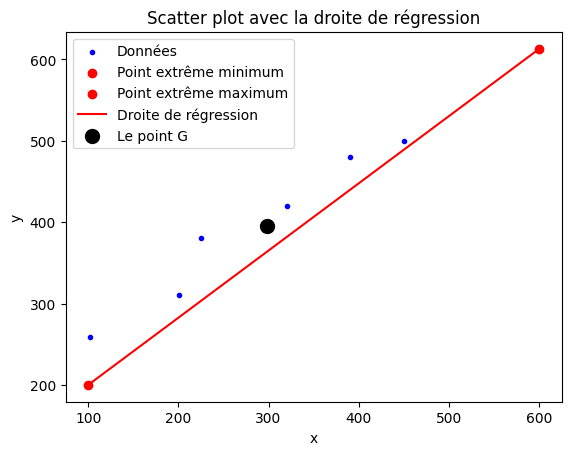

In [5]:
x = np.array([100, 102, 201, 225, 320, 390, 450, 600])
y = np.array([200, 259, 310, 380, 420, 480, 500, 613])

x_min, y_min = x[0], y[0]
x_max, y_max = x[-1], y[-1]
m = (y_max - y_min) / (x_max - x_min)
b = y_min - m * x_min
plt.scatter(x, y, c='b', marker='.', label="Données")
plt.scatter(x_min, y_min, c='r', marker='o', label="Point extrême minimum")
plt.scatter(x_max, y_max, c='r', marker='o', label="Point extrême maximum")
plt.plot(x, m * x + b, color='red', label='Droite de régression')
plt.scatter(G_point[0], G_point[1], c='black', marker='o', label="Le point G", s=100)
plt.title("Scatter plot avec la droite de régression")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()


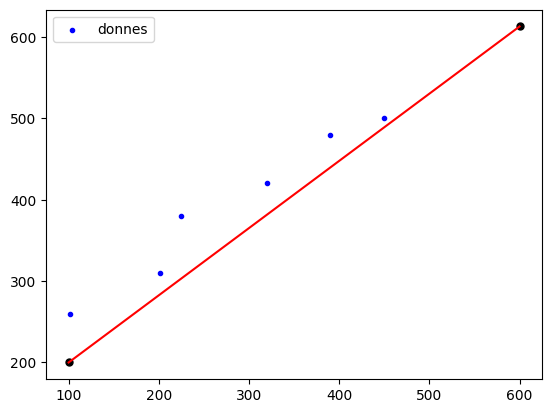

In [6]:
x = np.array([100, 102, 201, 225, 320, 390, 450, 600])
y = np.array([200, 259, 310, 380, 420, 480, 500, 613])

xmin , ymin = x[0],y[0]
xmax , ymax = x[-1],y[-1]

a = (ymax - ymin) / (xmax - xmin)

b = ymin - a*xmin

plt.scatter(x,y,c="blue",marker='.',label="donnes")
plt.plot(x,a*x+b,c='red')
plt.scatter(xmax,ymax,c='black',marker='.',s=100)
plt.scatter(xmin,ymin,c='black',marker='.',s=100)
plt.legend()

## Travail affaire

Nous avons un fichier csv **"STATISTIQUES_EQUIPE_LIGUE1.csv"** qui contient quelques chiffres sur les clubs de la Ligue 1 2022-2023 (Le Championnat de France de football). Le fichier contient les colonnes suivantes :

- **equipe** : le nom du club
- **Victoire** : nombre de matchs gagnés
- **Nuls** : nombre de matchs Nuls
- **Defaites** : nombre de matchs défaites
- **ButsPour** : nombre de buts marqués
- **ButsContre** : nombre de buts encaissés
- **FautesCommises** : nombre de fautes commises
- **PassesReussies** : nombre de passes réussies
- **ButstTete** : nombre de buts marqués de la tête
- **HorsJeux** : nombre de hors-jeux3/3
- **0-15**, **16-30**, **31-45**, **46-60**, **61-75**, **76-90** : représentent respectivement le nombre de buts marqués par créneaux horaires.

1. Créer un ndarray à partir du fichier STATISTIQUES_EQUIPE_LIGUE1.csv et vérifier le nombre de lignes et de colonnes.
2. Calculer le nombre moyen de buts par match.
3. Calculer la valeur moyenne du nombre de points (3 points pour une victoire, 1 point pour un nul et 0 points pour une défaite).
4. Quelle équipe a le plus grand nombre de victoires ?
5. Quel est le club ayant inscrit le plus grand nombre de buts ?
6. Quelle équipe a le plus grand nombre de hors-jeux ?
7. Quelle équipe possède la meilleure attaque et celle qui possède la meilleure défense ?
8. Trouver le nombre des équipes dont le nombre de buts marqués est inférieur à celui encaissé, puis afficher le nom de ces équipes.
9. Calculer ensuite la différence de buts (buts pour - buts contre).
10. Calculer pour chaque créneau horaire le pourcentage de buts marqués pour chaque club.
11. Joindre les tableaux nécessaires dans un seul ndarray (20, 17) avec les colonnes suivantes : club, points, Victoire, Nuls, Defaite, ButsPour, Butscontre, Différence, HorsJeux, ButsParMatch, ButsEncaissésParMatch, pourcentageButsMarques_creneau.
12. Trier le tableau obtenu dans la question 11 selon le nombre des points.
13. En utilisant la méthode corrcoef(), afficher la matrice de corrélation. Interpréter le résultat obtenu.
14. Sauvegarder le tableau trié dans un fichier csv avec l’entête correspondant.


In [7]:
import numpy as np
import pandas as pd

df = pd.read_csv('STATISTIQUES_EQUIPE_LIGUE1.csv',delimiter=';')
row , col = df.shape
print("le nombre de ligne : ",row)
print("le nombre de colonnes",col)

le nombre de ligne :  20
le nombre de colonnes 16


In [8]:
df

,equipe,Victoire,Nuls,Defaites,ButsPour,ButsContre,Fautescommises,PassesReussies,ButsTetes,HorsJeux,0-15,16-30,31-45,46-60,61-75,76-90
0,Ajaccio,3,3,9,14,24,214,4307,3,23,0,1,5,3,3,2
1,Angers,2,2,11,15,34,188,5159,3,17,2,1,2,2,4,4
2,Auxerre,3,4,8,14,31,164,5134,2,23,3,1,2,1,3,4
3,Brest,3,4,8,16,28,197,4912,4,26,3,2,1,3,5,2
4,Clermont,5,4,6,19,23,158,5514,2,25,3,0,1,6,4,5
5,Lens,11,3,1,26,10,216,6766,4,19,1,4,2,5,6,8
6,Lille,8,2,5,27,23,209,6751,2,24,4,4,7,3,4,5
7,Lorient,8,4,3,26,21,144,4939,2,19,5,4,5,7,2,3
8,Lyon,6,3,6,23,18,182,7240,5,23,3,4,3,3,5,5
9,Marseille,9,3,3,26,13,219,6146,4,20,5,1,8,4,3,5


**Calculer le nombre moyen de buts par match**

In [9]:
moyen_buts = np.mean(df['ButsPour'])
moyen_buts

22.2

**Calculer la valeur moyenne du nombre de points (3 points pour une victoire, 1 point pour un nul et 0 points pour une défaite)**

In [10]:
points = df['Victoire'] * 3 + df['Defaites'] * 0 + df['Nuls'] * 1 
moyen_point = np.mean(points)
moyen_point

20.5

**4. Quelle équipe a le plus grand nombre de victoires ?**

In [11]:
max_vectoires = df.loc[(df['Victoire'].idxmax(),'equipe')]
max_vectoires

'PSG'

**5. Quel est le club ayant inscrit le plus grand nombre de buts ?**

In [12]:
max_buts = df.loc[(df['ButsPour'].idxmax(),'equipe')]
max_buts

'PSG'

**6. Quelle équipe a le plus grand nombre de hors-jeux ?**


In [13]:
max_hors_jeux = df.loc[(df['HorsJeux'].idxmax(),'equipe')]
max_hors_jeux

'PSG'

**7. Quelle équipe possède la meilleure attaque et celle qui possède la meilleure défense**

In [14]:
meilleure_attaque = df.loc[(df['ButsPour'].idxmax(),'equipe')]
meilleure_defense = df.loc[(df['ButsContre'].idxmax(),'equipe')]
print(meilleure_attaque)
print(meilleure_defense)

PSG
Angers


**8 Trouver le nombre des équipes dont le nombre de buts marqués est inférieur à celui encaissés puis afficher le nom de ces équipes**

In [15]:
club_na = []
for i in range(len(df)):
    if(df['ButsPour'][i] > df['ButsContre'][i]):
        club_na.append((df['equipe'][i]))
print(len(club_na))

8


In [16]:
df.loc[(df['ButsPour'] > df['ButsContre'],'equipe')]

5          Lens
6         Lille
7       Lorient
8          Lyon
9     Marseille
10       Monaco
14          PSG
16       Rennes
Name: equipe, dtype: object

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'Troyes'),
  Text(1, 0, 'Toulouse'),
  Text(2, 0, 'Strasbourg'),
  Text(3, 0, 'Rennes'),
  Text(4, 0, 'Reims'),
  Text(5, 0, 'PSG'),
  Text(6, 0, 'Nice'),
  Text(7, 0, 'Nantes'),
  Text(8, 0, 'Montpellier'),
  Text(9, 0, 'Monaco'),
  Text(10, 0, 'Marseille'),
  Text(11, 0, 'Lyon'),
  Text(12, 0, 'Lorient'),
  Text(13, 0, 'Lille'),
  Text(14, 0, 'Lens'),
  Text(15, 0, 'Clermont'),
  Text(16, 0, 'Brest'),
  Text(17, 0, 'Auxerre'),
  Text(18, 0, 'Angers'),
  Text(19, 0, 'Ajaccio')])

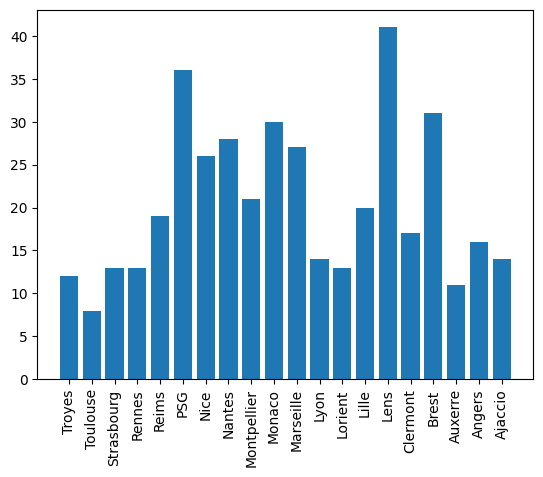

In [17]:
import matplotlib.pyplot as plt 
x = df['equipe'][::-1]
y = points
plt.bar(x,y)
plt.xticks(rotation=90)


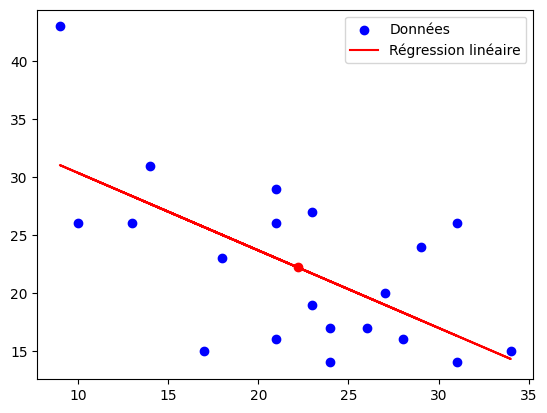

In [18]:
x = df['ButsContre']
y = df['ButsPour']
x = np.array(x)
y = np.array(y)
a = np.cov(x, y)[0, 1] / np.var(x)
b = np.mean(y) - a * np.mean(x)
modele_regression = a * x + b
plt.scatter(x, y, color='blue', label='Données')
plt.scatter(x.mean(),y.mean(),c="r")
plt.plot(x, modele_regression, color='red', label='Régression linéaire')
plt.legend()


[[1.         0.83857704]
 [0.83857704 1.        ]]


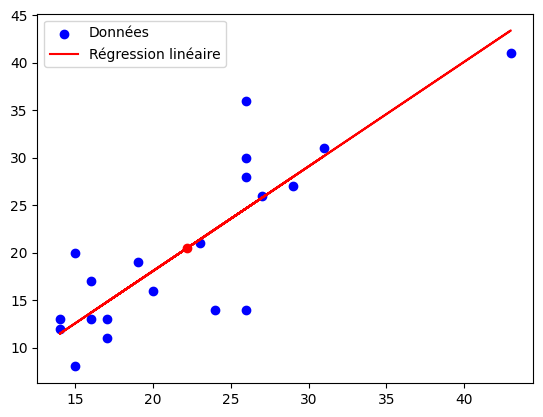

In [19]:
x = df['ButsPour']
y = points
print(np.corrcoef(x,y))

a = np.cov(x, y)[0, 1] / np.var(x)
b = np.mean(y) - a * np.mean(x)
modele_regression = a * x + b
plt.scatter(x, y, color='blue', label='Données')
plt.scatter(x.mean(),y.mean(),c="r")
plt.plot(x, modele_regression, color='red', label='Régression linéaire')
plt.legend()

In [20]:
y = a * 100 + b 
print(int(y))

106


In [21]:
club_na

['Lens', 'Lille', 'Lorient', 'Lyon', 'Marseille', 'Monaco', 'PSG', 'Rennes']

**9. Calculer ensuite la différence de buts (buts pour - buts contre)**

In [22]:
difference_buts = df['ButsPour']-df['ButsContre']
difference_buts

0    -10
1    -19
2    -17
3    -12
4     -4
5     16
6      4
7      5
8      5
9     13
10     8
11    -5
12    -7
13    -2
14    34
15    -5
16    17
17    -9
18    -7
19    -5
dtype: int64

**10. Calculer pour chaque créneau horaire le pourcentage de buts marqués pour chaque club.**


In [23]:
time_intervals = ['0-15', '16-30', '31-45', '46-60', '61-75', '76-90']
for interval in time_intervals:
    buts_inteval = df[interval].sum()
    pourcentage = (df[interval] / buts_inteval) * 100
    print("Pourcentage de buts marqués dans l'intervalle", interval, ":", pourcentage.tolist())


Pourcentage de buts marqués dans l'intervalle 0-15 : [0.0, 3.4482758620689653, 5.172413793103448, 5.172413793103448, 5.172413793103448, 1.7241379310344827, 6.896551724137931, 8.620689655172415, 5.172413793103448, 8.620689655172415, 5.172413793103448, 13.793103448275861, 1.7241379310344827, 1.7241379310344827, 8.620689655172415, 1.7241379310344827, 3.4482758620689653, 3.4482758620689653, 3.4482758620689653, 6.896551724137931]
Pourcentage de buts marqués dans l'intervalle 16-30 : [1.694915254237288, 1.694915254237288, 1.694915254237288, 3.389830508474576, 0.0, 6.779661016949152, 6.779661016949152, 6.779661016949152, 6.779661016949152, 1.694915254237288, 3.389830508474576, 6.779661016949152, 1.694915254237288, 5.084745762711865, 11.864406779661017, 8.47457627118644, 8.47457627118644, 5.084745762711865, 5.084745762711865, 6.779661016949152]
Pourcentage de buts marqués dans l'intervalle 31-45 : [6.944444444444445, 2.7777777777777777, 2.7777777777777777, 1.3888888888888888, 1.388888888888888

**Joindre les tableaux nécessaires dans un seul ndarray (20, 17) avec les colonnes suivantes :**
**club, points, Victoire, Nuls, Defaite, ButsPour, Butscontre, Différence, HorsJeux,**
**ButsParMatch, ButsEncaissésParMatch, pourcentageButsMarques_creneau**

In [24]:
# projet R

data = pd.read_csv("STATISTIQUES_EQUIPE_LIGUE1.csv",delimiter=';')
data = data.drop('equipe',axis=1)
data['points'] = points

correlation_matrix = data.corr()

print(correlation_matrix)

                Victoire      Nuls  Defaites  ButsPour  ButsContre   
Victoire        1.000000 -0.524927 -0.834842  0.849281   -0.836114  \
Nuls           -0.524927  1.000000 -0.030317 -0.437244    0.130244   
Defaites       -0.834842 -0.030317  1.000000 -0.714556    0.897649   
ButsPour        0.849281 -0.437244 -0.714556  1.000000   -0.609958   
ButsContre     -0.836114  0.130244  0.897649 -0.609958    1.000000   
Fautescommises  0.013480 -0.031820  0.004749 -0.097788   -0.118846   
PassesReussies  0.743723 -0.395961 -0.617295  0.656477   -0.708802   
ButsTetes       0.428215 -0.211366 -0.366169  0.442853   -0.407431   
HorsJeux        0.243251 -0.189714 -0.162961  0.384242   -0.169258   
0-15            0.292625 -0.455425 -0.049092  0.509777    0.049035   
16-30           0.507037 -0.032022 -0.574725  0.664875   -0.457945   
31-45           0.575981 -0.460661 -0.378462  0.574245   -0.377503   
46-60           0.674946 -0.249036 -0.631552  0.694928   -0.518285   
61-75           0.36

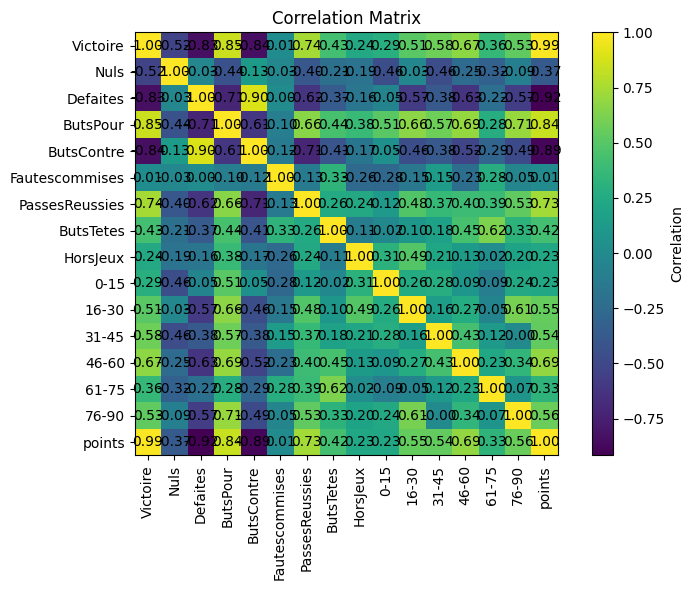

<Figure size 640x480 with 0 Axes>

In [25]:
# Plot the correlation matrix as an image
plt.figure(figsize=(8, 6))
plt.imshow(correlation_matrix, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Correlation')
plt.title('Correlation Matrix')
plt.xticks(range(len(correlation_matrix)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix)), correlation_matrix.columns)
for i in range(len(correlation_matrix)):
    for j in range(len(correlation_matrix)):
        plt.text(j, i, '{:.2f}'.format(correlation_matrix.iloc[i, j]), horizontalalignment='center', verticalalignment='center')

plt.tight_layout()
plt.show()
plt.tight_layout()
plt.show()


In [26]:
our_data = ['equipe','ButsPour','ButsContre','points']
df['points'] = points
newdf = df[our_data]

newdf.to_csv('equipe_ligue1.csv',index=False)

In [27]:
m_data = pd.read_csv('equipe_ligue1.csv',delimiter=';')


In [30]:
m_data


,"equipe,ButsPour,ButsContre,points"
0,"Ajaccio,14,24,12"
1,"Angers,15,34,8"
2,"Auxerre,14,31,13"
3,"Brest,16,28,13"
4,"Clermont,19,23,19"
5,"Lens,26,10,36"
6,"Lille,27,23,26"
7,"Lorient,26,21,28"
8,"Lyon,23,18,21"
9,"Marseille,26,13,30"


In [33]:
df.describe()

,Victoire,Nuls,Defaites,ButsPour,ButsContre,Fautescommises,PassesReussies,ButsTetes,HorsJeux,0-15,16-30,31-45,46-60,61-75,76-90,points
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.00000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,5.500000,4.000000,5.500000,22.200000,22.200000,184.700000,5625.800000,3.150000,24.150000,2.900000,2.95000,3.600000,3.950000,3.750000,5.050000,20.500000
std,3.332456,1.835326,2.837716,7.345604,7.045715,23.432097,1171.308562,1.899446,4.837083,1.889026,1.79106,2.303316,2.187885,1.332785,2.799906,9.168022
min,1.000000,2.000000,0.000000,14.000000,9.000000,143.000000,4052.000000,0.000000,17.000000,0.000000,0.00000,1.000000,1.000000,2.000000,1.000000,8.000000
25%,3.000000,3.000000,3.750000,16.000000,17.750000,162.750000,4911.000000,2.000000,19.750000,1.750000,1.00000,2.000000,2.750000,3.000000,3.000000,13.000000
50%,4.500000,4.000000,6.000000,21.500000,23.000000,189.000000,5203.500000,3.000000,23.500000,3.000000,3.00000,3.000000,3.000000,3.500000,5.000000,18.000000
75%,8.000000,4.250000,7.250000,26.000000,27.250000,198.500000,6535.750000,4.000000,26.250000,4.000000,4.00000,5.250000,5.250000,4.250000,6.000000,27.250000
max,13.000000,8.000000,11.000000,43.000000,34.000000,219.000000,8797.000000,8.000000,36.000000,8.000000,7.00000,8.000000,8.000000,7.000000,12.000000,41.000000


In [34]:
df

,equipe,Victoire,Nuls,Defaites,ButsPour,ButsContre,Fautescommises,PassesReussies,ButsTetes,HorsJeux,0-15,16-30,31-45,46-60,61-75,76-90,points
0,Ajaccio,3,3,9,14,24,214,4307,3,23,0,1,5,3,3,2,12
1,Angers,2,2,11,15,34,188,5159,3,17,2,1,2,2,4,4,8
2,Auxerre,3,4,8,14,31,164,5134,2,23,3,1,2,1,3,4,13
3,Brest,3,4,8,16,28,197,4912,4,26,3,2,1,3,5,2,13
4,Clermont,5,4,6,19,23,158,5514,2,25,3,0,1,6,4,5,19
5,Lens,11,3,1,26,10,216,6766,4,19,1,4,2,5,6,8,36
6,Lille,8,2,5,27,23,209,6751,2,24,4,4,7,3,4,5,26
7,Lorient,8,4,3,26,21,144,4939,2,19,5,4,5,7,2,3,28
8,Lyon,6,3,6,23,18,182,7240,5,23,3,4,3,3,5,5,21
9,Marseille,9,3,3,26,13,219,6146,4,20,5,1,8,4,3,5,30


In [38]:
df.loc[(df['ButsContre'].idxmin(),'equipe')]


'PSG'

In [3]:
def linearRegression(x,w,b):
    return x*w + b   
def mean_squared_error(y,y_pred):
    return ((y-y_pred) ** 2).mean() / 2.0

def plot_linear_regression(x, y, y_pred):
  plt.ylim((-2.0, 2.0))
  error = y - y_pred
  mse = mean_squared_error(y, y_pred).round(2)
  plt.fill_between(x, y, y_pred, color='r', alpha=0.25, label=f'Error (MSE = {mse})')
  plt.bar(x, error, width=0.005, bottom=y_pred, color='red', alpha=0.25)
  plt.scatter(x, y, s=100, c='g', label='Data points')
  plt.plot(x, y_pred, '--', label='Linear regression')
  _ = plt.legend(loc='best')

  

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

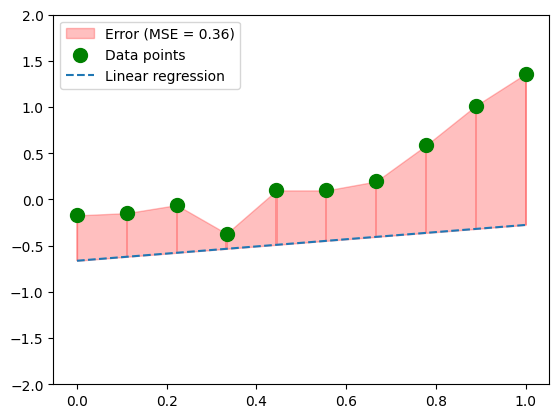

In [4]:
n_points = 10
noise_magnitude = 0.2

x = np.linspace(0.0, 1.0, n_points)
w_0 = np.random.normal()
b_0 = np.random.normal()
y_pred = linearRegression(x,w_0,b_0)
y_real = 1.5 * x ** 1.8 - 0.3
y = y_real + noise_magnitude * np.random.normal(size=n_points)
plot_linear_regression(x,y,y_pred)


